# Quantum Computing 
https://en.wikipedia.org/wiki/Quantum_computing
***


### What is Quantum computing?
Quantum computing uses the phenomena of quantum mechanics and mathematics to deliver a huge leap forward in computation to solve certain issues.

### What is a Quantum computer?
Quantum computers are computers which use quantum physics to store data and perform tasks.  In a quantum computer, the basic unit of memory is a quantum bit or qubit. Qubits are made using physical systems, such as the spin of an electron or the orientation of a photon.


### What is a Qubit?
Instead of bits, which conventional computers use, a quantum computer uses quantum bits—known as qubits.  This means that a computer using qubits can store an enormous amount of information and uses less energy doing so than a classical computer. This also means they have the potential to process a lot more data compared to classical computers.

### What is the difference between a Quantum and Classical computer?
<table>
<tr>
<td>Quantum Computer</td>
<td>Classical Computer</td>
</tr>
<tr>
<td>Calculates with qubits, which can represent 0 and 1 at the same time</td>
<td>Calculates with transistors, which can represent either 0 or 1</td>
</tr>  
<tr>
<td>Power increases exponentially in proportion to the number of qubits</td>
<td>Power increases in a 1:1 relationship with the number of transistors</td>
</tr>
<tr>
<td>Quantum computers have high error rates and need to be kept extremely cold </td>
<td>Classical computers have low error rates and can operate at room temp</td>
</tr>
<tr>
<td>Well suited for tasks like optimization problems, data analysis and simulations </td>
<td>Most everyday processing is best handled on a classical computer</td>
</tr>  
</table>

***
## Deutsch's Algorithm
https://en.wikipedia.org/wiki/Deutsch%E2%80%93Jozsa_algorithm

Deutsch's algorithm is special as it was the first algorithm to prove that quantum computers could solve computations faster than conventional computers.  The algorithm solves the following problem in classical computers:

Pretend you have a hundred hands in front of you, each hand holding a heads or tails coin. On a classical computer, you would have to search through all of the hands. What if I told you that with a quantum computer, solving this problem can be done by opening all hands at once simultaneously. This is the problem a quantum computer can solve.

**The problem**: Imagine someone is hiding a coin in each of their hands. The coin, when revealed, can be either heads or tails. Since there are two coins, there are 4 possible results in the sample space as given below.

<table>
<tr>
<td>Left hand</td>
<td>Right hand</td>
</tr>
<tr>
<td>Heads </td>
<td>Heads</td>
</tr>  
<tr>
<td>Tails </td>
<td>Heads</td>
</tr>
<tr>
<td>Heads </td>
<td>Tails</td>
</tr>
<tr>
<td>Tails </td>
<td>Tails</td>
</tr>  
</table>

The first and fourth outcome is an example of a constant outcome, whereas the second and third are balanced outcomes. If I were to reveal my left hand, and say it was heads, there is still not enough information to determine the value of the coin in the right hand. Imagine if there were 100 hands in front of you and you had to search through each of the hands one at a time. There are 2100 results in the sample space of all possible outcomes. In the worst case, you would have to look until the 51st hand, because if the first 50 were heads, the 51st would indicate whether the outcome is balanced(tails) or constant(heads).

Let us substitute heads with 0 and tails with 1, since there can only be two possible outcomes.

Then the result of each hand can be the result of applying a function 𝑓 to a set of inputs which maps a single bit(0 or 1) to 𝑓(0) or 𝑓(1). If 𝑓(0)=𝑓(1) then f is constant otherwise it is balanced.

<table>
<tr>
<td>f(0)</td>
<td>f(1)</td>
</tr>
<tr>
<td>0 </td>
<td>0</td>
</tr>  
<tr>
<td>0 </td>
<td>1</td>
</tr>
<tr>
<td>1 </td>
<td>0</td>
</tr>
<tr>
<td>1 </td>
<td>1</td>
</tr>  
</table>

We can think of this function as a black box, or oracle, that is hidden from us. In the black box we don't know whether the function is hidden, constant or balanced.

### Simulating Deutsch's Algorithm with Qiskit

In [6]:
# Qiskit itself
import qiskit

In [7]:
# Aer simulator 
import qiskit.providers.aer as aer

In [8]:
# Diagrams
import matplotlib
import matplotlib.pyplot as plt

In [9]:
plt.style.use('ggplot')

## Preliminaries


### Qubits
***

$|0 \rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$

$|1 \rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$

$|\psi \rangle = \begin{bmatrix} \alpha \\ \beta \end{bmatrix}$ 

$\alpha = a + bi \qquad \beta = c + di \qquad a,b,c,d \in \mathbb{R}$

$ \alpha^2 + \beta^2 = 1$



### Gates
***
##### Hadamard Gate
Now we will create a superposition state using Hadamard Gates so that we can iterate through all 4 states of the 2 qubit system at once. Hadamard gate can be used to convert the qubit from clustering state to uniform superposed state.

$ H = \begin{bmatrix} \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$

$ H | 0 \rangle = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1\end{bmatrix} = \begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}}\end{bmatrix} = |+ \rangle$

$ H | 1 \rangle = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ -1\end{bmatrix} = \begin{bmatrix} \frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}}\end{bmatrix} = |-\rangle$

$H^* = H^{-1}$

$(a+bi)^* = a -bi$

$ I = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$

<br>

### Measurement
***

$ |\psi\rangle = \begin{bmatrix} \alpha \\ \beta \end{bmatrix} \Leftrightarrow \langle \psi | = \begin{bmatrix} \alpha^* & \beta^* \end{bmatrix}$



Form the braket, take its magnitude and square it
##### Probability of measurring 0 when in the + state 

  $|\langle 0 | + \rangle |^2 = | \begin{bmatrix} 1 & 0 \end{bmatrix} \begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{bmatrix} |^2 = |(1)(\frac{1}{\sqrt{2}}) (0)(\frac{1}{\sqrt{2}})|^2 = (\frac{1}{\sqrt{2}})^2 = \frac{1}{2}$  
  

  
##### Probability of measurring 1 when in the - state (visa versa) 


$|\langle 1 | - \rangle |^2 = | \begin{bmatrix} 0 & 1 \end{bmatrix} \begin{bmatrix} \frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}} \end{bmatrix} |^2 = |(0)(\frac{1}{\sqrt{2}}) (1)(-\frac{1}{\sqrt{2}})|^2 = (-\frac{1}{\sqrt{2}})^2 = \frac{1}{2}$

$|a+bi| = \sqrt{(a+bi)  (a-bi)} = \sqrt{a^2 + b^2}$

## Multiple qubits
***
#### To represent multiple qubits at one time, we take the Kronecker product
The Kronecker product is an operation that transforms two matrices into a larger matrix that contains all the possible products of the entries of the two matrices. It possesses several properties that are often used to solve difficult problems in linear algebra and its applications.


First qubit: $0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$

Second qubit: $1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$

Together: $|01\rangle = |0\rangle \bigotimes 1 \rangle = \begin{bmatrix} 1 \begin{bmatrix} 0 \\ 1 \end{bmatrix} \\ 0 \begin{bmatrix} 0 \\ 1 \end{bmatrix} \end{bmatrix} = \begin{bmatrix} (1)(0) \\ (1)(1) \\ (0)(1)\\ (0)(0)\end{bmatrix} = \begin{bmatrix} 0 \\ 1 \\ 0\\ 0\end{bmatrix}$

##### CNOT gate
***
The controlled NOT gate is a quantum logic gate that is an essential component in the construction of a gate-based quantum computer. It can be used to entangle and disentangle Bell states.

$CNOT = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\0 & 0 & 1 & 0 \end{bmatrix}$

###### How 2 qubits interact with eachother

$CNOT \times |01\rangle = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\0 & 0 & 1 & 0 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \\ 0\\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \\ 0\\ 0 \end{bmatrix} = |01\rangle$

$CNOT \times |10\rangle = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\0 & 0 & 1 & 0 \end{bmatrix} \begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \\ 0\\ 1 \end{bmatrix} = |11\rangle$

<br>

## $H$ followed by $CNOT$

***

$H \bigotimes H = \begin{bmatrix} \frac{1}{\sqrt{2}} \begin{bmatrix} \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \end{bmatrix} & \frac{1}{\sqrt{2}} \begin{bmatrix} \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \end{bmatrix}  \\ \frac{1}{\sqrt{2}} \begin{bmatrix} \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \end{bmatrix} & -\frac{1}{\sqrt{2}} \begin{bmatrix} \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \end{bmatrix}\end{bmatrix}$

<br>

## Constant zero function
***

In [10]:
# Create a quantum circuit
circuit = qiskit.QuantumCircuit(2, 1)

In [11]:
# Initialise the first (0) qubit to 0.
circuit.initialize([1, 0] , 0)

In [12]:
# Initialise the second (1) qubit to 1.
circuit.initialize([0, 1] , 1)

In [13]:
# Apply a Hadamard gate to first qubit
circuit.h(0)

In [14]:
# Apply a Hadamard gate to first qubit
circuit.h(1)

In [15]:
# Apply another Hadamard gate to first qubit
circuit.h(0)

In [16]:
# Measure the first qubit
circuit.measure(0, 0)

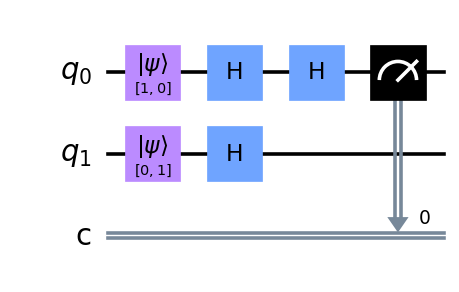

In [17]:
# draw the circuit
circuit.draw(output='mpl', scale=1.8)

In [18]:
# Create a simulation instance
simulator = aer.QasmSimulator()

In [19]:
# Compile the circuit in the simulator
compcircuit = qiskit.transpile(circuit, simulator)

In [20]:
# Simulate the circuit 500 times
job = simulator.run(compcircuit, shots=500)

In [21]:
# get results
results = job.result()

In [22]:
# Show the result counts
counts = results.get_counts()

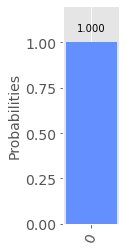

In [23]:
# Display Histogram
qiskit.visualization.plot_histogram(counts, figsize=(1,4))

<br>

## Constant one function
***

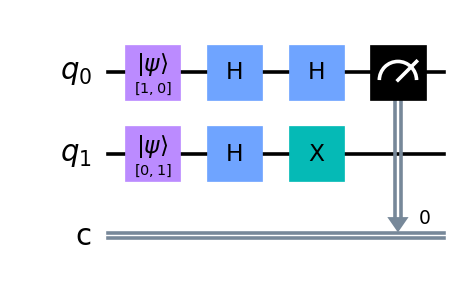

In [24]:
# Create a quantum circuit
circuit = qiskit.QuantumCircuit(2, 1)

# Initialise the first (0) qubit to 0.
circuit.initialize([1, 0] , 0)

# Initialise the second (1) qubit to 1.
circuit.initialize([0, 1] , 1)

# Apply a Hadamard gate to first qubit
circuit.h((0, 1))

# x gate
circuit.x(1)

# Apply another Hadamard gate to first qubit
circuit.h(0)

# Measure the first qubit only
circuit.measure(0, 0)

# draw the circuit
circuit.draw(output='mpl', scale=1.8)

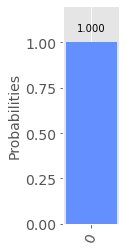

In [25]:
# Create a simulation instance
simulator = aer.QasmSimulator()

# Compile the circuit in the simulator
compcircuit = qiskit.transpile(circuit, simulator)

# Simulate the circuit 500 times
job = simulator.run(compcircuit, shots=500)

# get results
results = job.result()

counts = results.get_counts()

# Display Histogram
qiskit.visualization.plot_histogram(counts, figsize=(1,4))

<br>

## Balanced: $f(0) = 0, f(1) = 1$

*** 

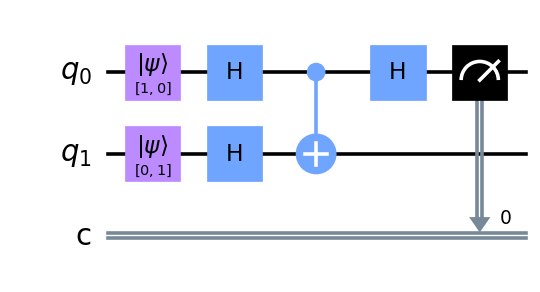

In [26]:
# Create a quantum circuit
circuit = qiskit.QuantumCircuit(2, 1)

# Initialise the first (0) qubit to 0.
circuit.initialize([1, 0] , 0)

# Initialise the second (1) qubit to 1.
circuit.initialize([0, 1] , 1)

# Apply a Hadamard gate to first qubit
circuit.h((0, 1))

# c not gate needs two cubits for input
circuit.cnot(0, 1)

# Apply another Hadamard gate to first qubit
circuit.h(0)

# Measure the first qubit only
circuit.measure(0, 0)

# draw the circuit
circuit.draw(output='mpl', scale=1.8)


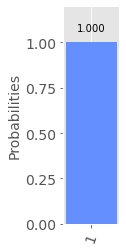

In [27]:
# Create a simulation instance
simulator = aer.QasmSimulator()

# Compile the circuit in the simulator
compcircuit = qiskit.transpile(circuit, simulator)

# Simulate the circuit 500 times
job = simulator.run(compcircuit, shots=1000)

# get results
results = job.result()

counts = results.get_counts()

# Display Histogram
qiskit.visualization.plot_histogram(counts, figsize=(1,4))

<br>

## Balanced: $f(0) = 1, f(1) = 0$

*** 

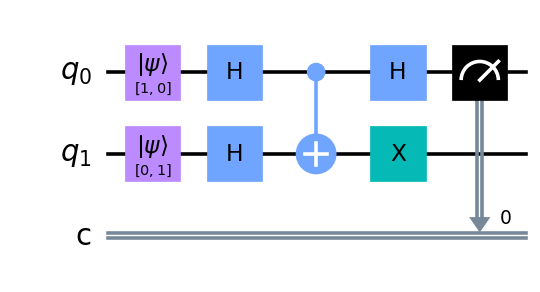

In [28]:
# Create a quantum circuit
circuit = qiskit.QuantumCircuit(2, 1)

# Initialise the first (0) qubit to 0.
circuit.initialize([1, 0] , 0)

# Initialise the second (1) qubit to 1.
circuit.initialize([0, 1] , 1)

# Apply a Hadamard gate to first qubit
circuit.h((0, 1))

# c not gate needs two cubits for input
circuit.cnot(0, 1)

# apply x to second qubit
circuit.x(1)

# Apply another Hadamard gate to first qubit
circuit.h(0)

# Measure the first qubit only
circuit.measure(0, 0)

# draw the circuit
circuit.draw(output='mpl', scale=1.8)

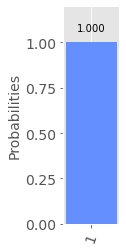

In [29]:
# Create a simulation instance
simulator = aer.QasmSimulator()

# Compile the circuit in the simulator
compcircuit = qiskit.transpile(circuit, simulator)

# Simulate the circuit 500 times
job = simulator.run(compcircuit, shots=1000)

# get results
results = job.result()

counts = results.get_counts()

# Display Histogram
qiskit.visualization.plot_histogram(counts, figsize=(1,4))

***

## Deutsch's algorithm with Random Function

In [30]:
# Qiskit itself
import qiskit

# Aer simulator.
import qiskit.providers.aer as aer

# Diagrams.
import matplotlib.pyplot as plt

# Random numbers.
import random

# Change pyplot style.
plt.style.use('ggplot')

In [31]:
# Return a random (part of) circuit - implementing the quantum oracle for f.
def random_f():
    # Create a circuit with 2 qubits, 1 classical bit.
    circuit = qiskit.QuantumCircuit(2, 1)
    
    # Pick one of the four functions at random.
    f_number = random.randint(1, 4)
    
    # 1: Constant 0 function. f(0) = f(1) = 0.
    # 2: Constant 1 function. f(0) = f(1) = 1.
    # 3: Balanced identity function. f(0) = 0, f(1) = 1.
    # 4: Balanced not function. f(0) = 1, f(1) = 0.
    
    if f_number == 1:
        # Apply Identity gate to second qubit.
        circuit.i(1)
    elif f_number == 2:
        # Apply Pauli x gate to second qubit.
        circuit.x(1)
    elif f_number == 3:
        # Apply CNOT gate to from first to second qubit.
        circuit.cnot(0, 1)
    elif f_number == 4:
        # Apply CNOT gate to from first to second qubit.
        circuit.cnot(0, 1)
        # Apply Pauli x gate to second qubit.
        circuit.x(1)
    else:
        print("Error!")
        
    # Return the circuit.
    return circuit

### Create the first part of a circuit
***

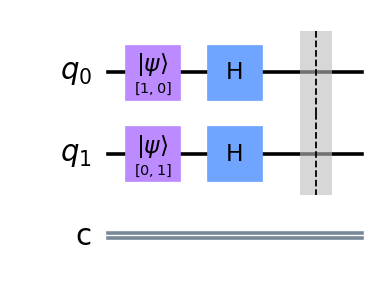

In [32]:
# Create a quantum circuit.
circuit = qiskit.QuantumCircuit(2, 1)

# Initialise the first qubit to |0>.
circuit.initialize([1, 0], 0)

# Initialise the second qubit to |1>.
circuit.initialize([0, 1], 1)

# Apply a Hadamard gate to each qubit.
circuit.h((0, 1))

# Separate parts of circuit.
circuit.barrier()

# Draw the circuit.
circuit.draw(output='mpl', scale=1.8)

### Create the second part of the circuit
***

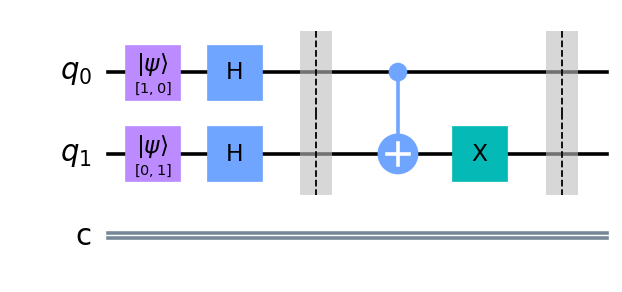

In [33]:
# Append the random_f() circuit to circuit.
circuit.compose(random_f(), inplace=True)

# Separate parts of circuit.
circuit.barrier()

# Draw the circuit.
circuit.draw(output='mpl', scale=1.8)

### Create the third part of the circuit
***

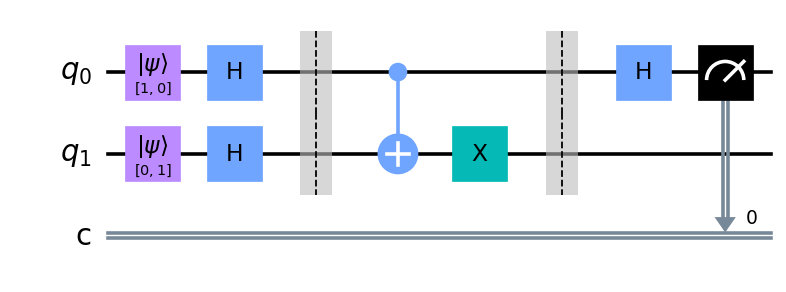

In [34]:
# Apply another Hadamard gate to the first qubit.
circuit.h(0)

# Measure the first qubit.
circuit.measure(0, 0)

# Draw the circuit.
circuit.draw(output='mpl', scale=1.8)

### Simulate and decide
***

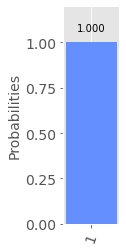

In [35]:
# Create a simulation instance.
simulator = aer.QasmSimulator()

# Compile the circuit in the simluator.
compcircuit = qiskit.transpile(circuit, simulator)

# Simulate the circuit 1000 times.
job = simulator.run(compcircuit, shots=1000)

# Get the results.
results = job.result()

# Show the result counts.
counts = results.get_counts()

# Display histogram
qiskit.visualization.plot_histogram(counts, figsize=(1, 4))

***